# 梯度下降

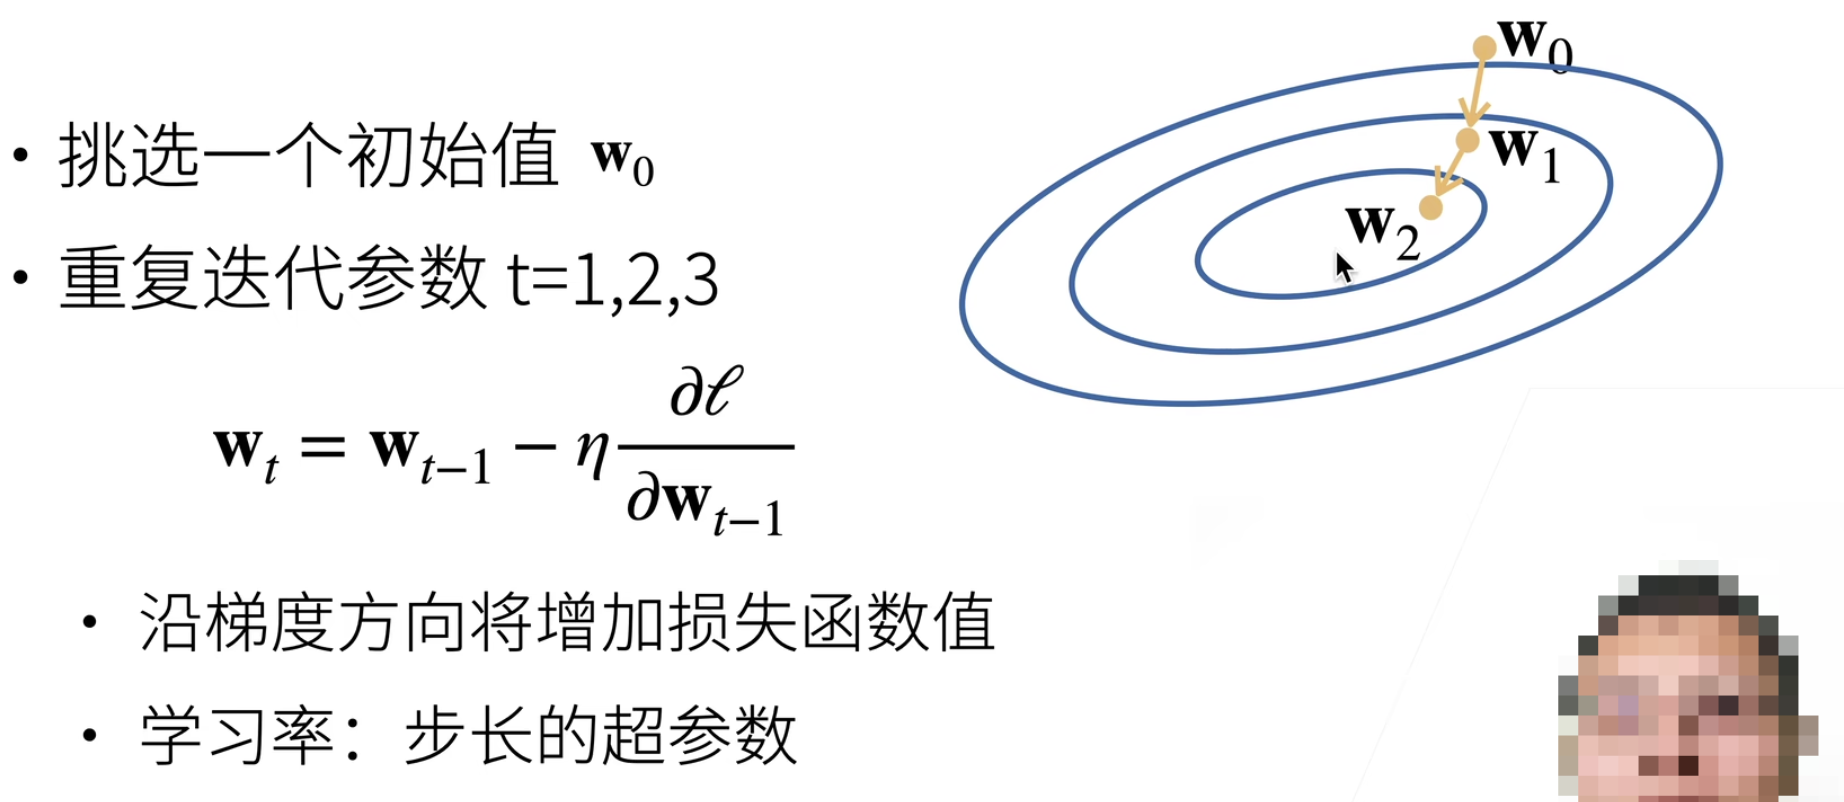 

In [46]:
import torch

In [47]:
%matplotlib inline

import random
from d2l import torch as d2l

In [48]:
def synthetic_data(w,b,num_examples):
    x = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(x,w) + b
    y += torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2

features, labels = synthetic_data(true_w,true_b,1000)

In [49]:
features.size()

torch.Size([1000, 2])

In [50]:
len(features)

1000

In [51]:
d2l.set_figsize()

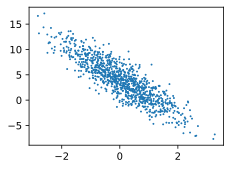

In [52]:
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(),1)

In [53]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X,y in data_iter(batch_size, features,labels):
    print(X,'\n', y)
    break

tensor([[-1.4694, -0.9276],
        [ 0.8841,  0.7990],
        [-1.2188, -0.5746],
        [-1.8146, -1.5437],
        [ 0.0644, -1.8294],
        [ 1.0893,  1.1800],
        [ 1.1148, -0.3180],
        [-0.7085,  0.8447],
        [ 1.7086,  0.1425],
        [-0.7450,  0.8850]]) 
 tensor([[ 4.4134],
        [ 3.2509],
        [ 3.7109],
        [ 5.8336],
        [10.5529],
        [ 2.3705],
        [ 7.5175],
        [-0.0851],
        [ 7.1366],
        [-0.2910]])


In [54]:
# 定义初始化模型参数

w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

def linreg(x,w,b):
    return torch.matmul(x,w)+b

In [55]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [56]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()

In [57]:
lr = 0.03
num_epochs =3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,features,labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
        
    with torch.no_grad():
        train_1 = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1}, loss {float(train_1.mean()):f}')

epoch1, loss 0.051311
epoch2, loss 0.000218
epoch3, loss 0.000050


In [58]:
true_w - w.reshape(true_w.shape)

tensor([ 0.0010, -0.0009], grad_fn=<SubBackward0>)

In [59]:
true_b-b

tensor([0.0005], grad_fn=<RsubBackward1>)

# 线性回归简洁实现

In [60]:
import numpy as np
from torch.utils import data
from d2l import torch as d2l

In [61]:
true_w = torch.tensor([2,-1.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)

In [62]:
features

tensor([[-0.8454, -1.0559],
        [-2.4722, -0.8765],
        [ 0.7878,  0.3362],
        ...,
        [ 1.5062, -0.8902],
        [ 0.5151, -0.7986],
        [ 1.8543, -0.9315]])

In [63]:
def load_array(data_arrays,batch_size,is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size =10
data_iter = load_array((features,labels),batch_size)

next(iter(data_iter))

[tensor([[ 0.3367,  0.5387],
         [-1.4153, -0.3728],
         [-0.6474, -2.0559],
         [ 1.6200,  0.5609],
         [-1.3153,  0.6181],
         [ 0.2607, -0.1000],
         [ 0.1173, -0.1603],
         [-1.0298, -1.4079],
         [ 0.0620,  2.4670],
         [-0.7253,  0.0917]]),
 tensor([[4.1188],
         [1.8920],
         [5.8012],
         [6.6594],
         [0.6944],
         [4.8719],
         [4.6744],
         [4.1181],
         [0.8860],
         [2.6270]])]

In [64]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))

In [65]:
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [66]:
loss = nn.MSELoss()

In [67]:
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

In [68]:
num_epochs = 3

for epoch in range(num_epochs):
    for x,y in data_iter:
        l = loss(net(x),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features),labels)
    print(f'epoch {epoch+1}, loss {l:f}')

epoch 1, loss 0.000232
epoch 2, loss 0.000094
epoch 3, loss 0.000094


In [117]:
x = torch.tensor([1.0, 2, 4, 8])
torch.exp(x)


tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])